# Exercise 18

## Analyze class homeworks


In [382]:
!pip install textdistance
import textdistance
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('E18.xlsx')
data.head()


,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

In [385]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier

In [386]:
for column in data.columns:
    data[column] = data[column].astype(str)
data['Text'] =  data[["T1", "T2", "T3", "T4", "T5", "T6"]].apply(lambda x: ''.join(x), axis=1)
data['long_Text'] = data['Text'].apply(len)

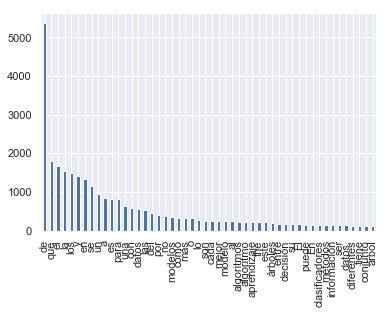

In [387]:
pd.Series(' '.join(data['Text']).split()).value_counts()[:50].plot(kind='bar')

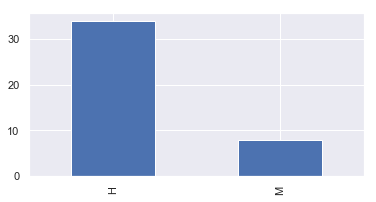

In [388]:
pd.Series(data["Sexo"]).value_counts().plot(kind = "bar",figsize=(6,3))

In [389]:
promedios = pd.pivot_table(data,index=["Sexo"],margins=True)
promedios

,long_Text
Sexo,
H,9800.000000
M,10159.125000
All,9868.404762


El promedio de palabras de los hombres es de 9.800 y mujeres 10.159, representa un 4% más de palabras.

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [391]:
X = data.drop(['Sexo'], axis=1)
data.fillna(value=' ', inplace=True)
data1['Textos'] = X.iloc[0:].apply(lambda x:'{}\n{}\n{}\n{}\n{}\n{}'.format(x[0],x[1],x[2],x[3],x[4],x[5]), axis=1)
X = data1["Textos"]
X.shape[0]

42

In [392]:
similarity = np.zeros((X.shape[0],X.shape[0]))
for j in range(len(X)):
    for i in range(len(X)):
        similarity[i,j] = textdistance.ratcliff_obershelp.similarity(X.iloc[i], X.iloc[j])

pd.DataFrame(similarity)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.000000,0.039491,0.048475,0.065348,0.014933,0.093792,0.082008,0.056676,0.089676,0.072561,...,0.065076,0.067429,0.078848,0.087241,0.096640,0.054079,0.014115,0.065532,0.068883,0.045017
1,0.063265,1.000000,0.062462,0.040077,0.082911,0.095337,0.059698,0.047639,0.110208,0.065378,...,0.071965,0.099906,0.096965,0.075484,0.048089,0.077747,0.032692,0.089835,0.032628,0.088273
2,0.053499,0.062462,1.000000,0.062123,0.080644,0.103934,0.068323,0.069373,0.103413,0.105300,...,0.113220,0.061841,0.039020,0.103943,0.061715,0.055795,0.007963,0.101286,0.042372,0.057892
3,0.076396,0.049793,0.072750,1.000000,0.072480,0.070404,0.091012,0.110296,0.080625,0.082042,...,0.064330,0.042900,0.056948,0.066826,0.046421,0.069037,0.004708,0.060315,0.072633,0.041586
4,0.024003,0.095274,0.092540,0.050403,1.000000,0.077241,0.022680,0.071882,0.099834,0.061071,...,0.100370,0.089256,0.103974,0.086666,0.040457,0.039600,0.017440,0.053215,0.042193,0.087409
5,0.085685,0.071472,0.065327,0.061032,0.076690,1.000000,0.102369,0.074508,0.127428,0.066918,...,0.075860,0.086253,0.105588,0.069328,0.044329,0.112364,0.048097,0.099322,0.073714,0.072650
6,0.077537,0.048384,0.069677,0.073827,0.057355,0.068121,1.000000,0.049856,0.076686,0.063957,...,0.079916,0.055807,0.040216,0.099382,0.078726,0.061560,0.024929,0.063413,0.067758,0.074336
7,0.108423,0.058257,0.063005,0.054298,0.035724,0.058832,0.023873,1.000000,0.066136,0.094434,...,0.045074,0.042656,0.066716,0.111116,0.071276,0.075253,0.020964,0.090174,0.050583,0.050588
8,0.068229,0.089014,0.072757,0.045739,0.095986,0.099328,0.082724,0.066890,1.000000,0.104222,...,0.106341,0.035504,0.055964,0.073011,0.077649,0.114069,0.034490,0.097870,0.088214,0.080821
9,0.087124,0.064984,0.109585,0.079045,0.038624,0.087257,0.093166,0.100877,0.116978,1.000000,...,0.098667,0.069986,0.109829,0.099181,0.071336,0.123226,0.020739,0.116826,0.045414,0.094859


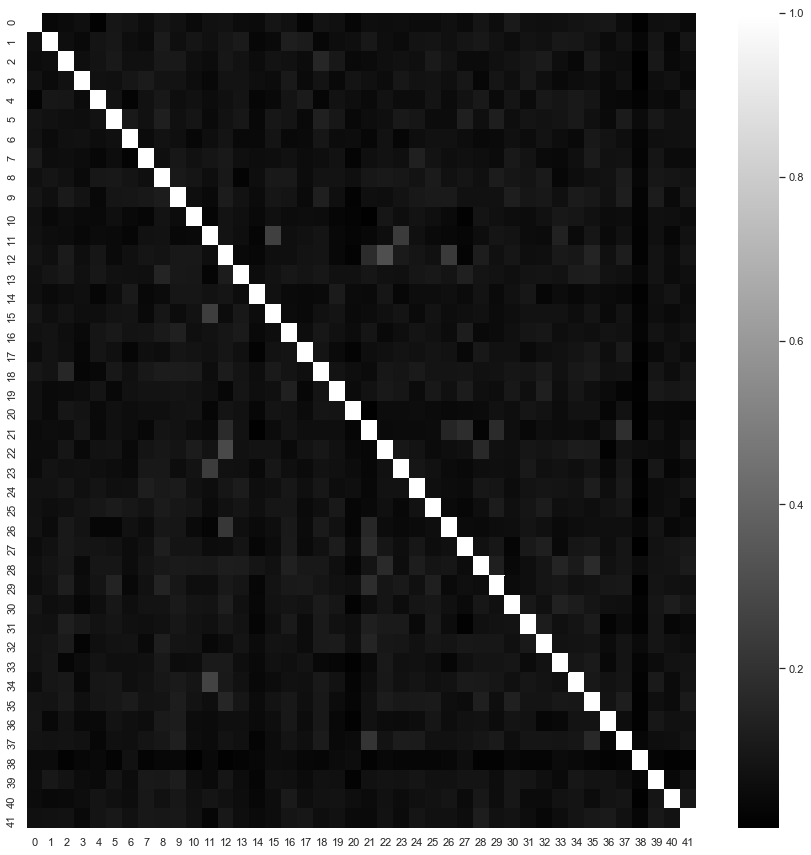

In [393]:
plt.figure(figsize=(15, 15))
graf = sns.heatmap(similaridades,cmap="gray")

# Exercise 18.3

Create a classifier to predict the sex of each student



In [403]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re, string
re_tok = re.compile(f'([{string.punctuation}])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

vect = TfidfVectorizer(input="content", 
                encoding="utf-8", 
                decode_error="strict", 
                strip_accents="unicode", 
                lowercase=True, 
                preprocessor=None, 
                tokenizer=tokenize, 
                analyzer="word", 
                stop_words=None, 
                token_pattern="(?u)\b\w\w+\b", 
                ngram_range=(1, 2), 
                max_df=0.9, 
                min_df=3, 
                max_features=None, 
                vocabulary=None, 
                binary=False, 
                norm="l2", 
                use_idf=1, 
                smooth_idf=1, 
                sublinear_tf=1)

X_dtm = vect.fit_transform(X)
y=data1["Sexo"]

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.2, random_state=42)

clf = OneVsRestClassifier(LogisticRegression(penalty="l2", 
                                             dual=False, 
                                             tol=0.0001, 
                                             C=1.0, 
                                             fit_intercept=True, 
                                             intercept_scaling=1, 
                                             class_weight="balanced", 
                                             random_state=None, 
                                             solver="liblinear", 
                                             max_iter=100, 
                                             multi_class="auto", 
                                             verbose=0, 
                                             warm_start=False, 
                                             n_jobs=None))

clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [405]:
y_pred = clf.predict(X_test)

In [407]:
metrics.accuracy_score(y_test,y_pred)

0.8888888888888888